<a href="https://colab.research.google.com/github/Azmouc1k/azmo-portfolio/blob/main/EEG_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 46.7 MB/s eta 0:00:00


In [ ]:
pip install mne-bids

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.6/163.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
pip install eeglabio


In [ ]:
pip install -U autoreject


<ipython-input-6-2b5ec8b255af>:21: RuntimeWarning: Unknown types found, setting as type EEG:
temp: ['Temp']
  raw = mne.io.read_raw_eeglab(filename)
<ipython-input-6-2b5ec8b255af>:21: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(filename)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 1691 samples (6.605 s)



<ipython-input-6-2b5ec8b255af>:21: RuntimeWarning: Not setting positions of 14 gsr/misc/resp channels found in montage:
['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_eeglab(filename)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Used Annotations descriptions: ['noise', 'noise_with_reponse', 'oddball_with_reponse', 'response', 'standard']
Not setting metadata
862 matching events found
Setting baseline interval to [-0.30078125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 862 events and 257 original time points ...
1 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/4 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=3


  0%|          | Repairing epochs : 0/637 [00:00<?,       ?it/s]

Dropped 75 epochs: 15, 28, 60, 63, 78, 79, 106, 112, 113, 114, 120, 136, 138, 139, 143, 151, 153, 170, 171, 172, 173, 174, 177, 182, 203, 206, 270, 274, 282, 323, 337, 341, 364, 383, 396, 432, 433, 434, 439, 443, 445, 452, 456, 457, 483, 484, 490, 492, 495, 507, 508, 519, 524, 525, 526, 528, 529, 530, 541, 550, 551, 552, 554, 556, 559, 577, 578, 579, 593, 600, 606, 608, 609, 621, 622
Overwriting existing file.


/usr/local/lib/python3.10/dist-packages/eeglabio/epochs.py:109 EEGLABIO: WARNING: Invalid event latencies, ignored for export.
/usr/local/lib/python3.10/dist-packages/eeglabio/epochs.py:118 EEGLABIO: WARNING: Some or all annotations have invalid onsets, discarded for export.


Overwriting existing file.


/usr/local/lib/python3.10/dist-packages/eeglabio/epochs.py:109 EEGLABIO: WARNING: Invalid event latencies, ignored for export.
/usr/local/lib/python3.10/dist-packages/eeglabio/epochs.py:118 EEGLABIO: WARNING: Some or all annotations have invalid onsets, discarded for export.


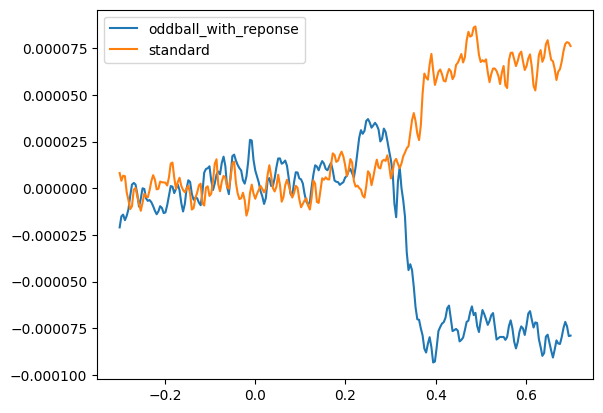

In [ ]:


# -----------------
# -----------------

filename = '/content/drive/MyDrive/OpenMIIR-RawEEG_v1/sub-001_task-P300_run-2_eeg.set'
rmChans  = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp']
cond1    = 'oddball_with_reponse'
cond2    = 'standard'
epochLowLim = -0.3;
epochHiLim  = 0.7;

# -----------------
# -----------------

import mne
import os
import matplotlib.pyplot as plt
from mne.datasets import sample
import autoreject

#Import
raw = mne.io.read_raw_eeglab(filename)

#sampling frequency
sfreq = raw.info['sfreq']

#Remove channels
raw.drop_channels(rmChans) #in this case I removed only those additional electrode that count heartbeat and congnitive conditions

raw.filter(l_freq=0.5, h_freq=None)

#epochs
events_from_annot, event_dict = mne.events_from_annotations(raw)
epochs_all = mne.Epochs(raw, events_from_annot, tmin=epochLowLim, tmax=epochHiLim, event_id=event_dict, preload=True, event_repeated='drop')
epochs = epochs_all[cond1, cond2]

#artifact rejection using the automatic rejection
ar = autoreject.AutoReject(n_interpolate=[1, 2, 3, 4], random_state=11,n_jobs=1, verbose=True)
ar.fit(epochs[:20])  # fit on a few epochs to save time
epochs_ar, reject_log = ar.transform(epochs, return_log=True)

#if i will continue in eeglab i can convert them here
fileout = os.path.splitext(filename)[0];
fileout_cond1 = fileout + '_cond1_mne.set'
fileout_cond2 = fileout + '_cond2_mne.set'
epochs_ar[cond1].export(fileout_cond1, overwrite=True)
epochs_ar[cond2].export(fileout_cond2, overwrite=True)

#plot exxale
plt.plot(epochs_ar[0].times, epochs_ar[0].get_data()[0,1,:].transpose())
plt.plot(epochs_ar[1].times, epochs_ar[1].get_data()[0,1,:].transpose())
plt.legend([cond1,cond2])
plt.show()

Event: standard, Time: 4.30 seconds
Event: standard, Time: 5.21 seconds
Event: standard, Time: 6.31 seconds
Event: standard, Time: 7.27 seconds
Event: standard, Time: 8.28 seconds
Event: standard, Time: 9.24 seconds
Event: standard, Time: 10.24 seconds
Event: standard, Time: 11.26 seconds
Event: standard, Time: 12.26 seconds
Event: noise_with_reponse, Time: 13.28 seconds
Event: response, Time: 13.67 seconds
Event: standard, Time: 14.25 seconds
Event: standard, Time: 15.28 seconds
Event: standard, Time: 16.29 seconds
Event: standard, Time: 17.34 seconds
Event: noise, Time: 18.29 seconds
Event: standard, Time: 19.32 seconds
Event: noise, Time: 20.27 seconds
Event: standard, Time: 21.28 seconds
Event: standard, Time: 22.31 seconds
Event: oddball_with_reponse, Time: 23.34 seconds
Event: response, Time: 23.84 seconds
Event: standard, Time: 24.32 seconds
Event: standard, Time: 25.27 seconds
Event: standard, Time: 26.34 seconds
Event: oddball_with_reponse, Time: 27.32 seconds
Event: response,

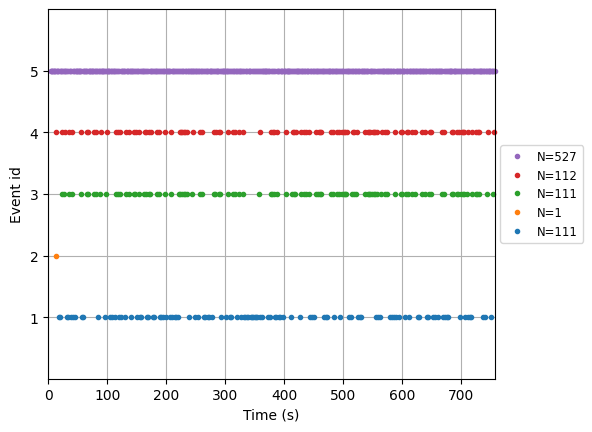

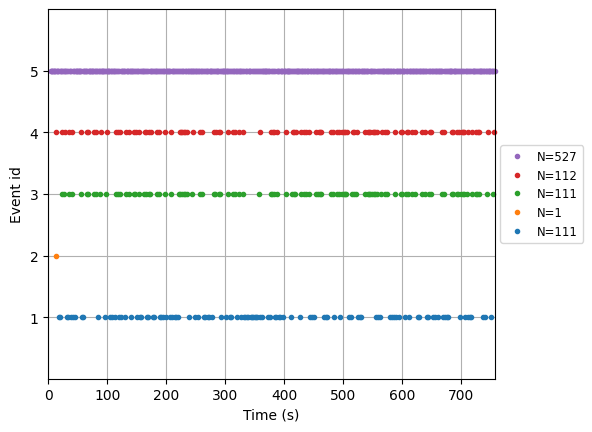

In [ ]:
#Event times
event_times = events_from_annot[:, 0] / sfreq  # first column contains sample indices
event_ids = events_from_annot[:, 2]  # third column contains event IDs

for event_time, event_id in zip(event_times, event_ids):
    event_label = list(event_dict.keys())[list(event_dict.values()).index(event_id)]  # find event label
    print(f"Event: {event_label}, Time: {event_time:.2f} seconds")

#plot
mne.viz.plot_events(events_from_annot, sfreq=sfreq, first_samp=raw.first_samp)

#oddball response is 3, standard is 5

In [ ]:
print(event_dict)

{'noise': 1, 'noise_with_reponse': 2, 'oddball_with_reponse': 3, 'response': 4, 'standard': 5}


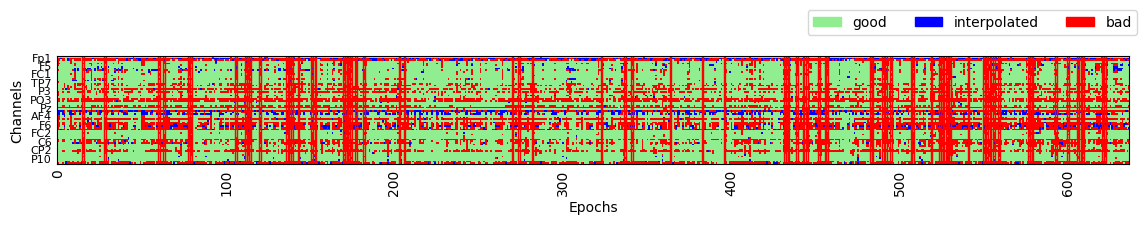

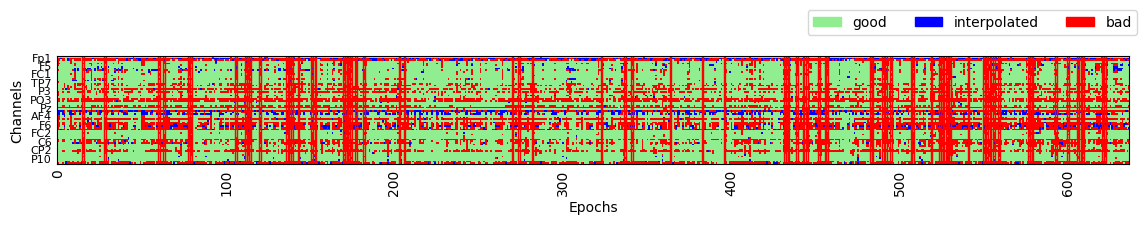

In [ ]:
reject_log.plot('horizontal')

Fitting ICA to data using 64 channels (please be patient, this may take a while)


<ipython-input-28-b53b0e590037>:2: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Selecting by non-zero PCA components: 64 components
Fitting ICA took 148.1s.


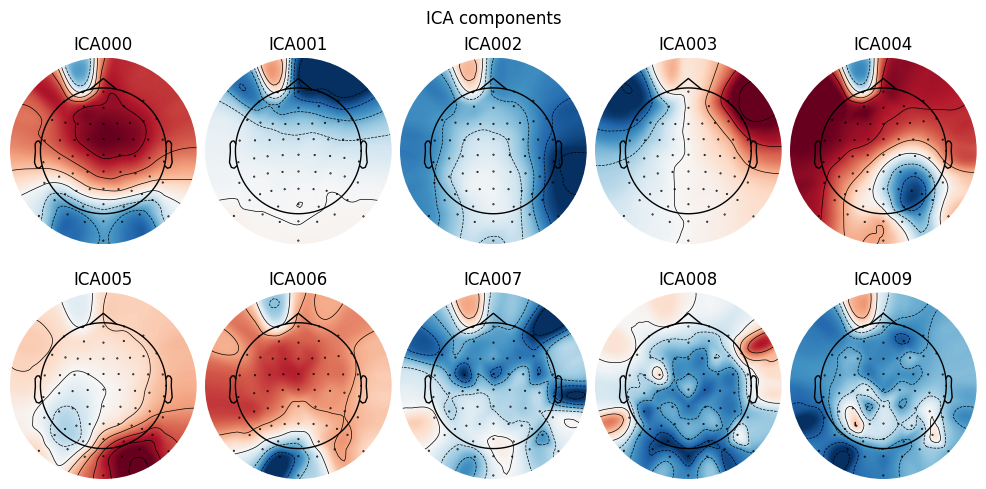

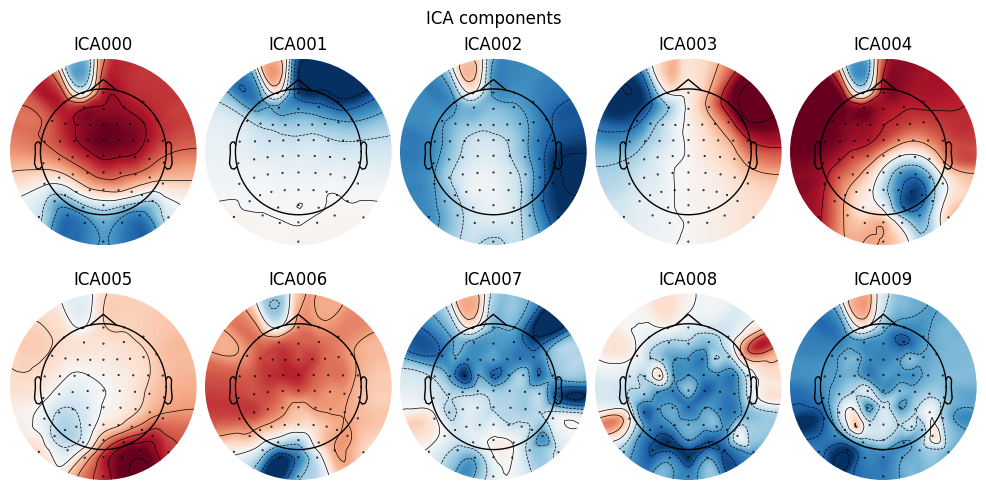

In [ ]:
#we can also use ICA to separate bad channels or autoreject??
ica = mne.preprocessing.ICA(random_state=99)
ica.fit(epochs)
ica.plot_components(range(0,10))

Remaining Channels:
['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']


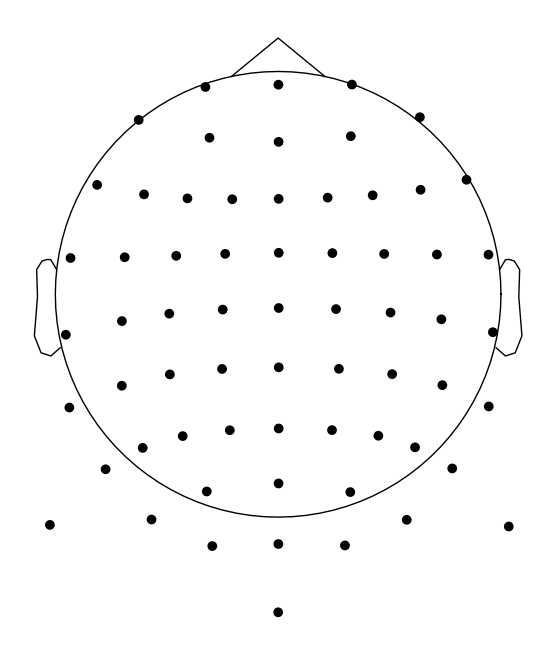

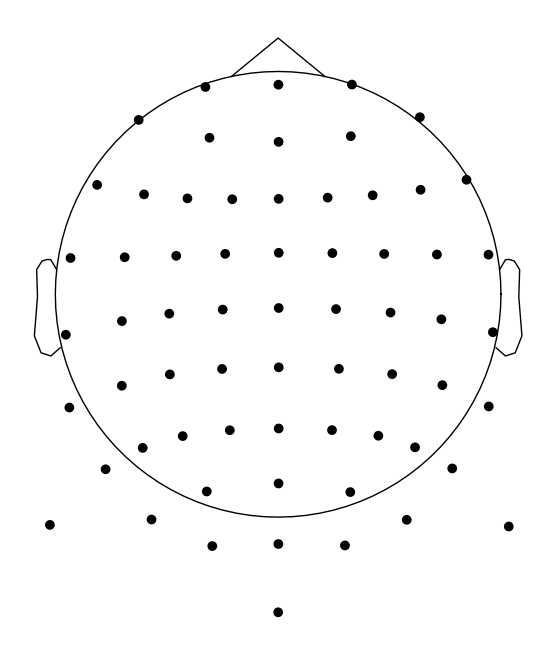

In [ ]:
remaining_channels = raw.ch_names
print("Remaining Channels:")
print(remaining_channels)
raw.plot_sensors(show=True)

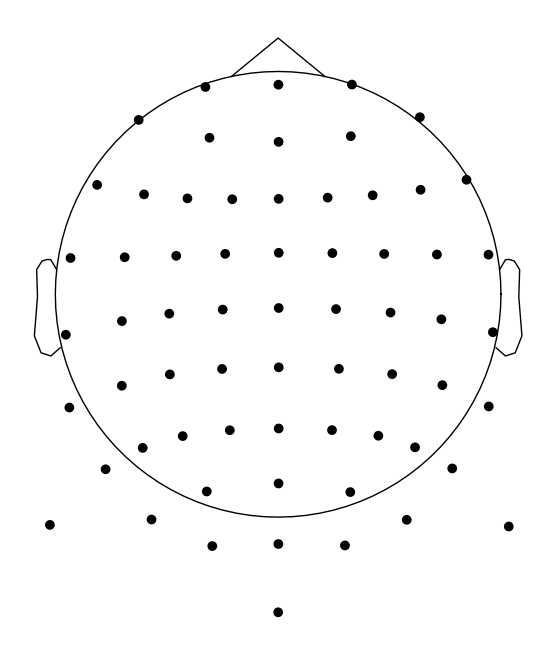

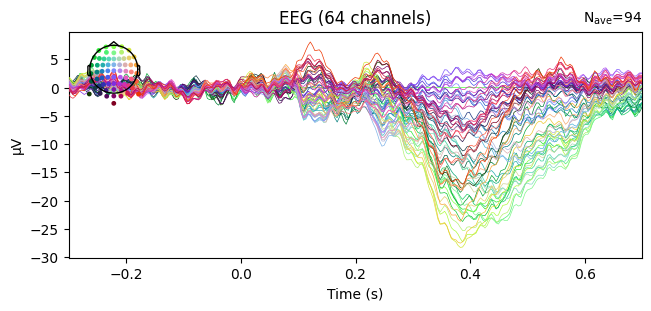

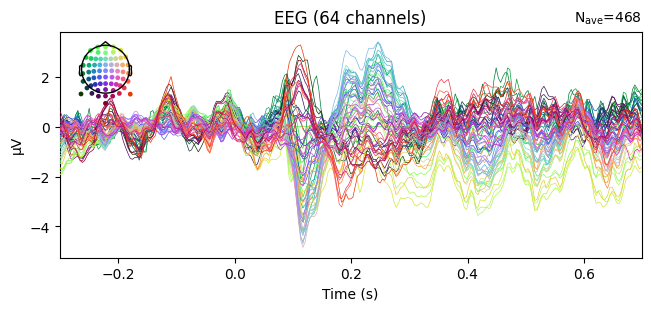

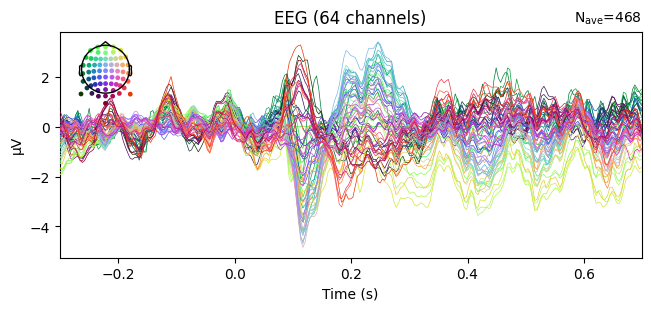

In [ ]:
#cond1 = oddball, cond2 = =statndard
raw.plot_sensors(show=True)
evoked_cond1 = epochs_ar[cond1].average()
evoked_cond2 = epochs_ar[cond2].average()

evoked_cond1.plot(spatial_colors=True, time_unit='s')
evoked_cond2.plot(spatial_colors=True, time_unit='s')
